<div class="markdown-google-sans">

# **The Fabrics Dataset**



## **1. Define problem**


<div class="markdown-google-sans">


The Fabrics Dataset consists of about 2000 samples of garments and fabrics. A small patch of each surface has been captured under 4 different illumination conditions using a custom made, portable photometric stereo sensor. All images have been acquired "in the field" (at clothes shops) and the dataset reflects the distribution of fabrics in real world, hence it is not balanced. The majority of clothes are made of specific fabrics, such as cotton and polyester, while some other fabrics, such as silk and linen, are more rare. Also, a large number of clothes are not composed of a single fabric but two or more fabrics are used to give the garment the desired properties (blended fabrics). For every garment we kept information (attributes) about its material composition from the manufacturer label and its type (pants, shirt, skirt etc.).

https://ibug.doc.ic.ac.uk/resources/fabrics/

In [1]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


##**2. Prepare Problem**


### **2.1. Load Libraries**

In [3]:
from IPython.display import display, FileLink
from tensorflow.keras.datasets import cifar10, cifar100
from tensorflow.keras import utils, layers, backend as K, Model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, SpatialDropout2D, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, Callback, ModelCheckpoint, TensorBoard

import tensorflow as tf
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt

from IPython.display import FileLink
from IPython import display
import pandas as pd

from sklearn.metrics import classification_report
import cv2

from PIL import Image
import os
import shutil
from pathlib import Path

import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model



In [4]:
#Khai báo thư viện
import os
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
cur_dir = "/content/drive/MyDrive/Fabric_Classification"
INPUT_DATA = f"{cur_dir}/data/Fabrics"


### **2.2. Load Dataset**

In [11]:
# Extracting file input directory and labels
input_filepaths = []
input_labels = []

for index, fabric in enumerate(os.listdir(INPUT_DATA)):
    print("In folder {} \n".format(fabric))
    for fabric_type in os.listdir(os.path.join(INPUT_DATA, fabric)):
        for fabric_img in os.listdir(os.path.join(INPUT_DATA, fabric, fabric_type)):
            if Path(fabric_img).suffix == '.png':
                src_image = os.path.join(INPUT_DATA, fabric, fabric_type, fabric_img)
                input_filepaths.append(src_image)
                input_labels.append(fabric)

In folder Terrycloth 

In folder Suede 

In folder Polyester 

In folder Utilities 

In folder Unclassified 

In folder Wool 

In folder Velvet 

In folder Viscose 

In folder Silk 

In folder Satin 

In folder Linen 

In folder Cotton 

In folder Leather 

In folder Crepe 

In folder Denim 

In folder Corduroy 

In folder Lut 

In folder Fleece 

In folder Nylon 

In folder Felt 

In folder Artificial_leather 

In folder Chenille 

In folder Artificial_fur 

In folder Acrylic 

In folder Blended 



## **3. Exploration Analyze Data - EDA**

In [12]:
data_df = pd.DataFrame(list(zip(input_filepaths, input_labels)), columns =['Filepath', 'Label'])
data_df

,Filepath,Label
0,/content/drive/MyDrive/Fabric_Classification/d...,Terrycloth
1,/content/drive/MyDrive/Fabric_Classification/d...,Terrycloth
2,/content/drive/MyDrive/Fabric_Classification/d...,Terrycloth
3,/content/drive/MyDrive/Fabric_Classification/d...,Terrycloth
4,/content/drive/MyDrive/Fabric_Classification/d...,Terrycloth
...,...,...
7892,/content/drive/MyDrive/Fabric_Classification/d...,Blended
7893,/content/drive/MyDrive/Fabric_Classification/d...,Blended
7894,/content/drive/MyDrive/Fabric_Classification/d...,Blended
7895,/content/drive/MyDrive/Fabric_Classification/d...,Blended


In [19]:

values, counts = np.unique(input_labels, return_counts=True)

class_distribution_df = pd.DataFrame({
    'Class': values,
    'Frequency': counts
})

class_distribution_df = class_distribution_df.sort_values('Frequency', ascending=False)

print("Class distribution info:\n")
print(class_distribution_df.info())
print("\nClass distribution details:\n")
print(class_distribution_df)

Class distribution info:

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 6 to 21
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Class      25 non-null     object
 1   Frequency  25 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 600.0+ bytes
None

Class distribution details:

                 Class  Frequency
6               Cotton       2352
3              Blended       1645
15           Polyester        904
8                Denim        648
20        Unclassified        492
24                Wool        360
14               Nylon        228
17                Silk        200
23             Viscose        148
10              Fleece        132
7                Crepe        120
19          Terrycloth        120
5             Corduroy         96
16               Satin         96
12               Linen         76
11             Leather         64
4             Chenille         52
0              Acry

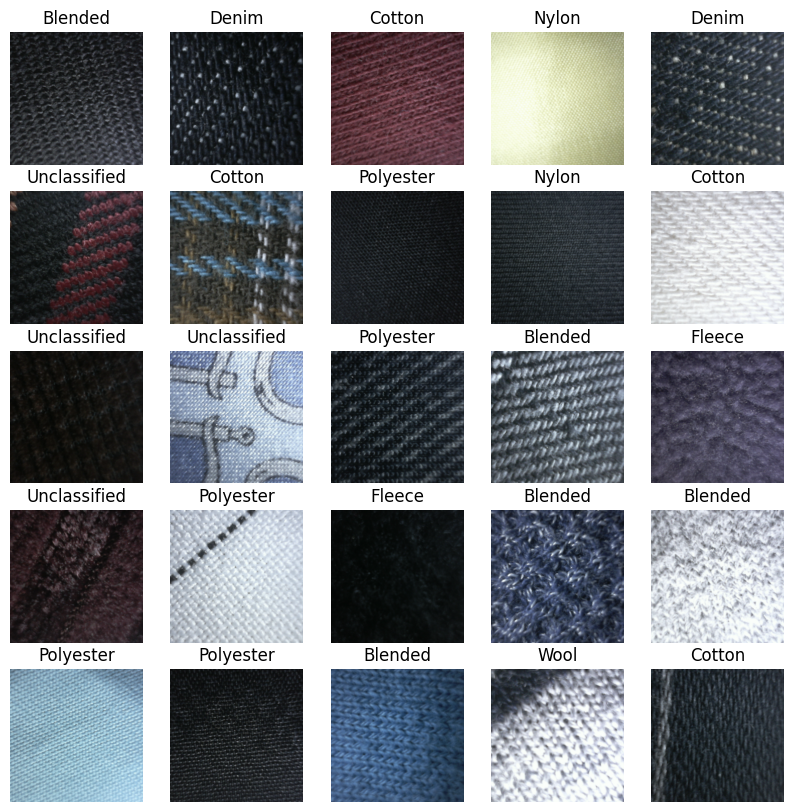

In [20]:
random_index = np.random.randint(0, len(data_df), 25)
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    ax.imshow(plt.imread(data_df.Filepath[random_index[i]]))
    ax.set_title(data_df.Label[random_index[i]])
    plt.axis('off')
plt.show()

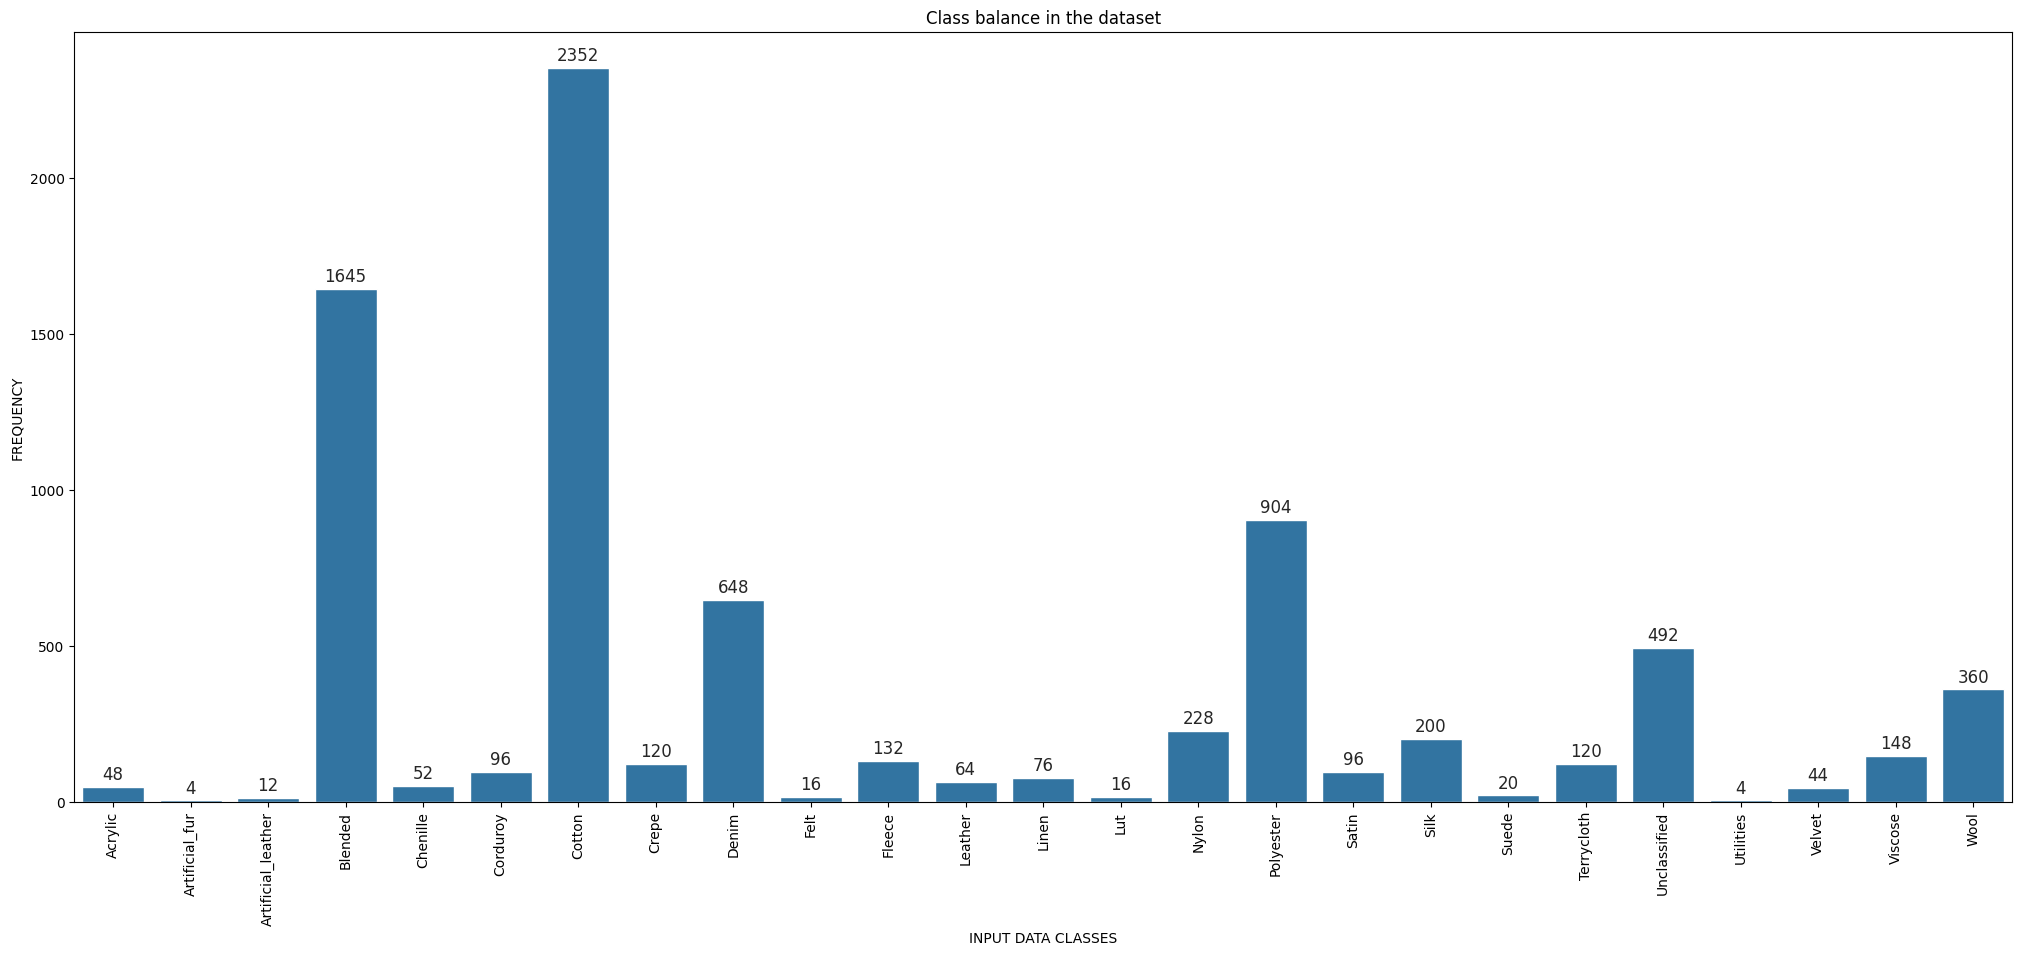

In [22]:
fig, ax = plt.subplots(figsize=(25,10))
values, counts = np.unique(input_labels, return_counts=True)
sns.set_theme()
ax = sns.barplot(x=values, y=counts)
ax.set_title("Class balance in the dataset")
ax.set_xlabel("INPUT DATA CLASSES")
ax.set_ylabel("FREQUENCY")
for g in ax.patches:
    ax.annotate(format(g.get_height(), '.0f'), (g.get_x() + g.get_width() / 2., g.get_height()), ha = 'center', va = 'center', xytext = (0, 9),
                   textcoords = 'offset points')

plt.xticks(rotation=90)
plt.show()

<div class="markdown-google-sans">

**Comments:**

---

- **Class imbalance**: There is a significant discrepancy in the number of samples between different classes. Some classes like **"Blended"** (1,645 samples), **"Cotton"** (2,352 samples), and **"Polyester"** (904 samples) have a large number of samples, while many other classes like **"Artificial_fur," "Utilities,"** and **"Suede"** only have a few samples (4-20 samples). This indicates that the dataset is imbalanced, with several classes severely underrepresented.

- The dataset is heavily skewed toward classes such as "Blended," "Cotton," and "Denim." To address this, techniques like sampling (over-sampling, under-sampling) or adjusting class weights during model training should be applied. Additionally, classes like "Artificial_fur," "Utilities," and "Suede" have very few samples, which may result in the model not learning the characteristics of these classes effectively.

- **Blended fabrics** are made from two or more different materials, such as Cotton and Polyester. In this experiment, we will exclude clothes made from blended fabrics and only retain those with at least 95% of a single material.

- The **"Unclassified"** class accounts for a significant portion of the data and includes fabric samples that are not clearly categorized. This creates a challenge for machine learning models due to the non-uniform nature of the data, but it also presents an opportunity to discover new fabric types. This class needs to be handled carefully to avoid negatively impacting model performance.

=> To ensure the machine learning model performs well across all classes, the next step should include **balancing the data or utilizing more robust machine learning techniques (such as augmentation) to handle the class imbalance.**









In [23]:
!jupyter nbconvert --to html '/content/drive/MyDrive/Gr3_Fabric_Classification/ipynb/eda.ipynb'


[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/Gr3_Fabric_Classification/ipynb/eda.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent t